<a href="https://colab.research.google.com/github/saramujawar22/Project/blob/main/startup_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

**Data Exploration and cleaning**

In [ ]:
data=pd.read_csv('startupsfunding.csv')
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,15-12-2020,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,Series D,"16,00,00,000",NaN
1,2,22-12-2020,Tax Buddy India,FinTech,Online tax adviser,Mumbai,Zenith Global,Seed,"10,00,000",NaN
2,3,15-12-2020,Delhivery,Supply chain,Transportation,Gurgaon,Steadview Capital,Secondary Market,"2,50,00,000",NaN
3,4,18-12-2020,PagarBook,SaaS,Employee management platform,Bengaluru,Sequoia Capital,Series A,"1,50,00,000",NaN
4,5,30-11-2020,Codingal,EduTech,Online coding platform,Bengaluru,"Rebright Partners, Java Capital, and GSF Accel...",Seed,"5,60,000",NaN


In [ ]:
data.shape

(3156, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156 entries, 0 to 3155
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3156 non-null   int64 
 1   Date dd/mm/yyyy    3156 non-null   object
 2   Startup Name       3156 non-null   object
 3   Industry Vertical  2985 non-null   object
 4   SubVertical        2220 non-null   object
 5   City  Location     2976 non-null   object
 6   Investors Name     3132 non-null   object
 7   InvestmentnType    3148 non-null   object
 8   Amount in USD      2182 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 246.7+ KB


In [ ]:
data.rename(columns={'Startup Name': 'StartupName', 'Industry Vertical': 'Industry','SubVertical': 'subIndustry', 'City  Location': 'CityLocation', 'Investors Name': 'InvestorName', 'InvestmentnType': 'InvestmentType', 'Amount in USD': 'Amount'}, inplace=True)
data.head()

,Sr No,Date dd/mm/yyyy,StartupName,Industry,subIndustry,CityLocation,InvestorName,InvestmentType,Amount,Remarks
0,1,15-12-2020,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,Series D,"16,00,00,000",NaN
1,2,22-12-2020,Tax Buddy India,FinTech,Online tax adviser,Mumbai,Zenith Global,Seed,"10,00,000",NaN
2,3,15-12-2020,Delhivery,Supply chain,Transportation,Gurgaon,Steadview Capital,Secondary Market,"2,50,00,000",NaN
3,4,18-12-2020,PagarBook,SaaS,Employee management platform,Bengaluru,Sequoia Capital,Series A,"1,50,00,000",NaN
4,5,30-11-2020,Codingal,EduTech,Online coding platform,Bengaluru,"Rebright Partners, Java Capital, and GSF Accel...",Seed,"5,60,000",NaN


**Cleaning date column and extracting month and year values from date **

In [ ]:
data['Date dd/mm/yyyy']=data['Date dd/mm/yyyy'].map(lambda x:str(x).replace('-',''))
data['Date dd/mm/yyyy']=data['Date dd/mm/yyyy'].map(lambda x:str(x).replace('/',''))

In [ ]:
data['Date']=pd.to_datetime(data['Date dd/mm/yyyy'],format='%d%m%Y',errors='coerce')
data['Year']=pd.DatetimeIndex(data['Date']).year
data['Month']=pd.DatetimeIndex(data['Date']).month

**Converting values in amount column from string to Integer**

In [ ]:
def isnum(x):
    try:
        x=int(str(x).replace(',',''))
    except:
        x=str(x).replace(',','')
    if isinstance(x,int):
        return x
    else:
        return 0

In [ ]:
data['Amount']=data['Amount'].map(isnum)

In [ ]:
def amount(x):
    if x<=100000:
        return '0-1L'
    elif x<=1000000:
        return '1L-10L'
    elif x<=5000000:
        return '10L-50L'
    elif x<=10000000:
        return '50L-1C'
    elif x<=20000000:
        return '1C-2C'
    elif x<=50000000:
        return '2C-5C'
    elif x<=100000000:
        return '5C-10C'
    elif x<=200000000:
        return '10C-20C'
    elif x<=400000000:
        return '20C-40C'
    elif x<=1000000000:
        return '40C-100C'
    elif x<=2000000000:
        return '100C-200C'
    elif x<=3000000000:
        return '200C-300C'
    else:
        return '300C+'

In [ ]:
data['Investment Range in USD']=data['Amount'].map(amount)
data.head()

,Sr No,Date dd/mm/yyyy,StartupName,Industry,subIndustry,CityLocation,InvestorName,InvestmentType,Amount,Remarks,Date,Year,Month,Investment Range in USD
0,1,15122020,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,Series D,160000000,NaN,2020-12-15,2020.0,12.0,10C-20C
1,2,22122020,Tax Buddy India,FinTech,Online tax adviser,Mumbai,Zenith Global,Seed,1000000,NaN,2020-12-22,2020.0,12.0,1L-10L
2,3,15122020,Delhivery,Supply chain,Transportation,Gurgaon,Steadview Capital,Secondary Market,25000000,NaN,2020-12-15,2020.0,12.0,2C-5C
3,4,18122020,PagarBook,SaaS,Employee management platform,Bengaluru,Sequoia Capital,Series A,15000000,NaN,2020-12-18,2020.0,12.0,1C-2C
4,5,30112020,Codingal,EduTech,Online coding platform,Bengaluru,"Rebright Partners, Java Capital, and GSF Accel...",Seed,560000,NaN,2020-11-30,2020.0,11.0,1L-10L


**Cleaning column CityLocation**

In [ ]:
data['CityLocation']=data['CityLocation'].map(lambda x: 'New Delhi' if (str(x)=='\\\\xc2\\\\xa0New Delhi') else x)
data['CityLocation']=data['CityLocation'].map(lambda x: 'Bangalore' if (str(x)=='Bengaluru') else x)
data['CityLocation']=data['CityLocation'].map(lambda x: 'Gurugram' if (str(x)=='Gurgaon' or str(x)=='\\\\xc2\\\\xa0Gurgaon') else x)
data['CityLocation']=data['CityLocation'].map(lambda x: 'Noida' if (str(x)=='\\\\xc2\\\\xa0Noida') else x)

**Cleaning column Industry**

In [ ]:
data['Industry']=data['Industry'].map(lambda x: 'E-Commerce' if (str(x)=='eCommerce' or str(x)=='ECommerce' or str(x)=='E-commerce' or str(x)=='Ecommerce' or str(x)=='ecommerce' or str(x)=='E-Commerce') else x)
data['Industry']=data['Industry'].map(lambda x: 'Education' if (str(x)=='Education' or str(x)=='Ed-Tech' or str(x)=='Online Education Platform' or str(x)=='EdTech' or str(x)=='Edtech') else x)
data['Industry']=data['Industry'].map(lambda x: 'Fintech' if (str(x)=='FinTech' or str(x)=='Fin-Tech' or str(x)=='Financial Tech') else x)
data['Industry']=data['Industry'].map(lambda x: 'Food & Beverage' if(str(x)=='Food & Beverage' or str(x)=='Food and Beverage' or str(x)=='Food' or str(x)=='Food & Beverages' or str(x)=='Food and Beverages') else x)
data['Industry']=data['Industry'].map(lambda x: 'Transport' if(str(x)=='Transportation') else x)
data['Industry']=data['Industry'].map(lambda x: 'Healthcare' if(str(x)=='Health and Wellness' or str(x)=='Health Care') else x)

**Cleaning column StartupName**

In [ ]:
data['StartupName']=data['StartupName'].map(lambda x: 'Byju' if(str(x)=='Byjuâ€™s') else x)
data['StartupName']=data['StartupName'].map(lambda x: 'Flipkart' if(str(x)=='Flipkart.com') else x)
data['StartupName']=data['StartupName'].map(lambda x:'Ola' if(str(x)=='Ola Cabs') else x)

**Cleaning column InvestorName**

In [ ]:
data['InvestorName']=data['InvestorName'].map(lambda x: 'Undisclosed Investors' if(str(x)=='Undisclosed investors' or str(x)=='Undisclosed Investor' or str(x)=='undisclosed investors' or str(x)=='Undisclosed' or str(x)=='Undisclosed investor') else x)

**Drop SR NO and Remarks Column**

In [ ]:
data.drop(columns=['Sr No','Remarks','Date dd/mm/yyyy'],inplace=True)
data.head()

,StartupName,Industry,subIndustry,CityLocation,InvestorName,InvestmentType,Amount,Date,Year,Month,Investment Range in USD
0,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,Series D,160000000,2020-12-15,2020.0,12.0,10C-20C
1,Tax Buddy India,Fintech,Online tax adviser,Mumbai,Zenith Global,Seed,1000000,2020-12-22,2020.0,12.0,1L-10L
2,Delhivery,Supply chain,Transportation,Gurugram,Steadview Capital,Secondary Market,25000000,2020-12-15,2020.0,12.0,2C-5C
3,PagarBook,SaaS,Employee management platform,Bangalore,Sequoia Capital,Series A,15000000,2020-12-18,2020.0,12.0,1C-2C
4,Codingal,EduTech,Online coding platform,Bangalore,"Rebright Partners, Java Capital, and GSF Accel...",Seed,560000,2020-11-30,2020.0,11.0,1L-10L


In [ ]:
data[['Industry','subIndustry','CityLocation','InvestorName','InvestmentType']].fillna('unknown',inplace=True)
data.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
data.isna().sum()

StartupName                0
Industry                   0
subIndustry                0
CityLocation               0
InvestorName               0
InvestmentType             0
Amount                     0
Date                       0
Year                       0
Month                      0
Investment Range in USD    0
dtype: int64

**cleaning column InvestmentType**

In [ ]:
data['InvestmentType']=data['InvestmentType'].apply(lambda x:x.replace(' ','').lower()) 

In [ ]:
data['InvestmentType']=data['InvestmentType'].map(lambda x: 'private equity' if (str(x)=='privateequity' or str(x)=='privateequityround') else x)
data['InvestmentType']=data['InvestmentType'].map(lambda x: 'seed funding' if (str(x)=='seedfunding' or str(x)=='seedround' or str(x)=='seed') else x)
data['InvestmentType']=data['InvestmentType'].map(lambda x: 'seed/angel funding' if (str(x)=='seed/angelfunding' or str(x)=='angel/seedfunding' or str(x)=='seed/anglefunding') else x)

In [ ]:
def calculate_n_investors(x):#function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
data['numberofinvestors']=data['InvestorName'].replace(np.NaN,'empty').map(calculate_n_investors)

In [ ]:
data.head()

,StartupName,Industry,subIndustry,CityLocation,InvestorName,InvestmentType,Amount,Date,Year,Month,Investment Range in USD,numberofinvestors
0,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,seriesd,160000000,2020-12-15,2020.0,12.0,10C-20C,1
1,Tax Buddy India,Fintech,Online tax adviser,Mumbai,Zenith Global,seed funding,1000000,2020-12-22,2020.0,12.0,1L-10L,1
2,Delhivery,Supply chain,Transportation,Gurugram,Steadview Capital,secondarymarket,25000000,2020-12-15,2020.0,12.0,2C-5C,1
3,PagarBook,SaaS,Employee management platform,Bangalore,Sequoia Capital,seriesa,15000000,2020-12-18,2020.0,12.0,1C-2C,1
4,Codingal,EduTech,Online coding platform,Bangalore,"Rebright Partners, Java Capital, and GSF Accel...",seed funding,560000,2020-11-30,2020.0,11.0,1L-10L,3


**ML Models**

In [ ]:
# import ML models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.tree import export_graphviz

# import train test split
from sklearn.model_selection import train_test_split

# import evaluators
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report,confusion_matrix

%matplotlib inline

# import SMOTE
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data.head()

,StartupName,Industry,subIndustry,CityLocation,InvestorName,InvestmentType,Amount,Date,Year,Month,Investment Range in USD,numberofinvestors
0,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,seriesd,160000000,2020-12-15,2020.0,12.0,10C-20C,1
1,Tax Buddy India,Fintech,Online tax adviser,Mumbai,Zenith Global,seed funding,1000000,2020-12-22,2020.0,12.0,1L-10L,1
2,Delhivery,Supply chain,Transportation,Gurugram,Steadview Capital,secondarymarket,25000000,2020-12-15,2020.0,12.0,2C-5C,1
3,PagarBook,SaaS,Employee management platform,Bangalore,Sequoia Capital,seriesa,15000000,2020-12-18,2020.0,12.0,1C-2C,1
4,Codingal,EduTech,Online coding platform,Bangalore,"Rebright Partners, Java Capital, and GSF Accel...",seed funding,560000,2020-11-30,2020.0,11.0,1L-10L,3


In [ ]:
X=data[['Industry','subIndustry','CityLocation','InvestmentType','Year','Month']]
y=data['Investment Range in USD']

In [ ]:
X=pd.get_dummies(X,columns=['Industry','subIndustry','CityLocation','InvestmentType'],drop_first=True)
y,y_unique=pd.factorize(y,sort=True)

In [ ]:
print(y_unique[:13])

Index(['0-1L', '100C-200C', '10C-20C', '10L-50L', '1C-2C', '1L-10L',
       '200C-300C', '20C-40C', '2C-5C', '300C+', '40C-100C', '50L-1C',
       '5C-10C'],
      dtype='object')


In [ ]:
X.head()

,Year,Month,Industry_Accounting,Industry_Advertising,"Industry_Advertising, Marketing",Industry_Aerospace,Industry_AgriTech,Industry_Agriculture,Industry_Agtech,Industry_Airfare Marketplace,Industry_Artificial Intelligence,Industry_Auto,Industry_Automation,Industry_Automobile,Industry_Automotive,Industry_Automotive Rental,Industry_B2B,Industry_B2B Marketing,Industry_B2B Platform,Industry_B2B-focused foodtech startup,Industry_BFSI,Industry_BioTech,"Industry_Block Chain, Cryptocurrency",Industry_Cafe,Industry_Clean-tech,Industry_Co-working Spaces,Industry_Compliance,Industry_Consumer Goods,Industry_Consumer Interne,Industry_Consumer Internet,Industry_Consumer Portal,Industry_Consumer Technology,Industry_Consumer internet,Industry_Customer Service,Industry_Customer Service Platform,Industry_Dairy Tech,Industry_Deep Tech AI,Industry_Deep-Tech,Industry_Digital Media,Industry_Digital Reconcilation and Financial Services,...,InvestmentType_follow-on,InvestmentType_fundinground,InvestmentType_inhousefunding,InvestmentType_inprogress,InvestmentType_m&a,InvestmentType_maidenround,InvestmentType_mezzanine,InvestmentType_personalinvestment,InvestmentType_pre-seed,InvestmentType_pre-seriesa,InvestmentType_pre-seriesb,InvestmentType_pre-seriese,InvestmentType_preseed,InvestmentType_preseriesa,InvestmentType_private,InvestmentType_private equity,InvestmentType_privatefunding,InvestmentType_secondarymarket,InvestmentType_seed funding,InvestmentType_seed/angel funding,InvestmentType_series1,InvestmentType_seriesa,InvestmentType_seriesb,InvestmentType_seriesb(extension),InvestmentType_seriesc,InvestmentType_seriesc1,InvestmentType_seriesd,InvestmentType_seriesd1,InvestmentType_seriese,InvestmentType_seriesf,InvestmentType_seriesg,InvestmentType_seriesh,InvestmentType_seriesj,InvestmentType_singleventure,InvestmentType_structureddebt,InvestmentType_termloan,InvestmentType_venture,InvestmentType_venture-seriesunknown,InvestmentType_ventureround,InvestmentType_ventureseries
0,2020.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(2188, 2270)

In [ ]:
# try Oversampling to increase the dataset rows
resample=RandomOverSampler()
X,y=resample.fit_resample(X,y)
X.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(10166, 2270)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=7,train_size=0.7)

**prediction based on target variable Investment Range in USD**

**Decision Tree Classifier**

In [ ]:
c1 = DecisionTreeClassifier(min_samples_split=10)

In [ ]:
tree1 = c1.fit(X_train,y_train)

In [ ]:
y_pred_t1 = c1.predict(X_train)

In [ ]:
y_pred1 = c1.predict(X_test)

In [ ]:
range_train_score_1 = accuracy_score(y_train, y_pred_t1)
range_train_score_1

0.978920741989882

In [ ]:
range_test_score_1 = accuracy_score(y_test, y_pred1)
range_test_score_1

0.899344262295082

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52       238
           1       0.97      1.00      0.98       253
           2       1.00      0.97      0.99       239
           3       0.70      0.75      0.72       234
           4       0.94      0.97      0.96       227
           5       0.67      0.60      0.63       229
           6       1.00      1.00      1.00       235
           7       0.99      1.00      1.00       226
           8       0.94      0.96      0.95       231
           9       1.00      1.00      1.00       218
          10       1.00      1.00      1.00       257
          11       0.82      0.96      0.88       227
          12       1.00      1.00      1.00       236

    accuracy                           0.90      3050
   macro avg       0.89      0.90      0.90      3050
weighted avg       0.89      0.90      0.90      3050



In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[112,   0,   0,  35,   4,  60,   0,   2,   7,   0,   0,  18,   0],
       [  0, 253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   7, 232,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 19,   1,   0, 175,   5,   9,   0,   0,   5,   0,   0,  19,   1],
       [  1,   0,   0,   1, 221,   0,   0,   0,   0,   0,   0,   4,   0],
       [ 56,   0,   0,  25,   3, 138,   0,   0,   2,   0,   1,   4,   0],
       [  0,   0,   0,   0,   0,   0, 235,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 226,   0,   0,   0,   0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   0, 222,   0,   0,   3,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 218,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 257,   0,   0],
       [  1,   0,   0,   7,   1,   0,   0,   0,   0,   0,   0, 218,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 236]])

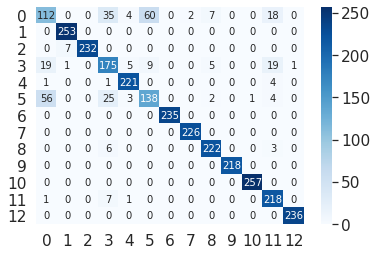

In [ ]:
df_cm1 = pd.DataFrame(cm1, range(13), range(13))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 10}, fmt='g') # font size
plt.show()

**Random Forest Classifier**

In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
rf_temp1 =  RandomForestClassifier(max_depth= 30, n_estimators= 60)

In [ ]:
rf_temp1_fit = rf_temp1.fit(X_train, y_train)
rf_temp1_train_predict = rf_temp1.predict(X_train)

rf_temp1_train_predict_score = accuracy_score(y_train, rf_temp1_train_predict) *100
rf_temp1_train_predict_score

97.14727374929736

In [ ]:
rf_temp1_test_predict = rf_temp1.predict(X_test)
rf_temp1_test_predict_score = accuracy_score(y_test, rf_temp1_test_predict) *100
rf_temp1_test_predict_score

89.18032786885246

In [ ]:
print(classification_report(y_test, rf_temp1_test_predict))

              precision    recall  f1-score   support

           0       0.62      0.33      0.43       238
           1       0.93      1.00      0.96       253
           2       1.00      0.97      0.99       239
           3       0.76      0.71      0.73       234
           4       0.93      0.96      0.95       227
           5       0.60      0.65      0.62       229
           6       0.97      1.00      0.98       235
           7       1.00      1.00      1.00       226
           8       0.91      1.00      0.95       231
           9       1.00      1.00      1.00       218
          10       1.00      1.00      1.00       257
          11       0.78      0.98      0.87       227
          12       1.00      1.00      1.00       236

    accuracy                           0.89      3050
   macro avg       0.88      0.89      0.88      3050
weighted avg       0.88      0.89      0.88      3050



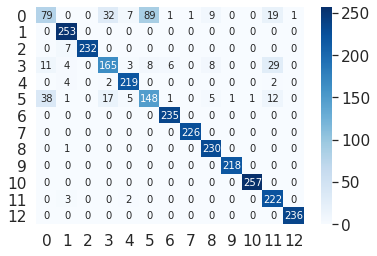

In [ ]:
cm3 = confusion_matrix(y_test, rf_temp1_test_predict)
df_cm3 = pd.DataFrame(cm3, range(13), range(13))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 10}, fmt='g') # font size
plt.show()